In [22]:
#Importing the CSV file
import pandas as pd 
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df = pd.read_csv("fifa_stats.csv")
df.columns = df.columns.str.strip()


df['Match (team 1 v team 2)'] = df['team1'] + ' vs ' + df['team2']


df['Goals team1'] = df['Goals team1'].astype(int)
df['Goals team2'] = df['Goals team2'].astype(int)

df ['Goals in Match'] = df['Goals team1'] + df['Goals team2']

df['Goals in Match'] = df['Goals in Match'].astype(int)

df['Score'] = df['Goals team1'].astype(str) + ' v ' + df['Goals team2'].astype(str)

df ['Total attempts team1'] = df['Total attempts team1'].astype(int)
df ['Total attempts team2'] = df['Total attempts team2'].astype(int)

df["Goal attempts in Match"] = df['Total attempts team1'] + df['Total attempts team2']

df['Goal attempts in Match'] = df['Goal attempts in Match'].astype(int)

cols = ['Match (team 1 v team 2)'] + [col for col in df.columns if col != 'Match (team 1 v team 2)']

df = df[cols]



first_column = cols[0]
cols.remove('Goals in Match')
idx = cols.index('Goals team2')
cols.insert(idx + 1, 'Goals in Match')
cols = [first_column] + cols[1:]
df = df[cols]


#df = df.drop(columns=['team1', 'team2'])


print(df.head())

     Match (team 1 v team 2)          team1         team2  \
0           QATAR vs ECUADOR          QATAR       ECUADOR   
1            ENGLAND vs IRAN        ENGLAND          IRAN   
2     SENEGAL vs NETHERLANDS        SENEGAL   NETHERLANDS   
3     UNITED STATES vs WALES  UNITED STATES         WALES   
4  ARGENTINA vs SAUDI ARABIA      ARGENTINA  SAUDI ARABIA   

  Possession in contest  Goals team1  Goals team2  Goals in Match  \
0                    8%            0            2               2   
1                    9%            6            2               8   
2                   11%            0            2               2   
3                   10%            1            1               2   
4                   12%            1            2               3   

   Total attempts team1  Total attempts team2  Goal preventions team1  \
0                     5                     6                       6   
1                    13                     8                       8   

In [23]:
#Finding the Average Possession

df['Possession in contest'] = df['Possession in contest'].str.rstrip('%').astype(float)

avg_possession = df['Possession in contest'].mean()


print(f"Average Possession: {avg_possession:.2f}%")


Average Possession: 11.91%


In [24]:
avg_Goals_in_match = df['Goals in Match'].mean()
print(f"Average Match Goals: {avg_Goals_in_match}")

Average Match Goals: 2.6875


In [25]:
avg_Goals_attempted_in_match = df['Goal attempts in Match'].mean()
print(f"Average Match Goals Attempted: {avg_Goals_attempted_in_match}")

Average Match Goals Attempted: 22.421875


In [26]:
match_competitve_goals_scored = df.loc[
    (df['Goals in Match'] > avg_Goals_in_match) & 
    ((df['Goals in Match'] != df['Goals team1']) & (df['Goals in Match'] != df['Goals team2'])),
    ['Match (team 1 v team 2)',
    'Score',
     'Goals in Match',
     'Goal attempts in Match'
     ]
]
    
print(tabulate(match_competitve_goals_scored, headers='keys', tablefmt='pretty'))




+----+------------------------------+-------+----------------+------------------------+
|    |   Match (team 1 v team 2)    | Score | Goals in Match | Goal attempts in Match |
+----+------------------------------+-------+----------------+------------------------+
| 1  |       ENGLAND vs IRAN        | 6 v 2 |       8        |           21           |
| 4  |  ARGENTINA vs SAUDI ARABIA   | 1 v 2 |       3        |           17           |
| 7  |     FRANCE vs AUSTRALIA      | 4 v 1 |       5        |           26           |
| 9  |       GERMANY vs JAPAN       | 1 v 2 |       3        |           35           |
| 14 |      PORTUGAL vs GHANA       | 3 v 2 |       5        |           19           |
| 17 |       QATAR vs SENEGAL       | 1 v 3 |       4        |           22           |
| 22 |      FRANCE vs DENMARK       | 2 v 1 |       3        |           31           |
| 26 |      CROATIA vs CANADA       | 4 v 1 |       5        |           22           |
| 28 |      CAMEROON vs SERBIA  

In [27]:
match_competitve_possesion_contest =  df.loc[
    (df['Possession in contest'] > avg_possession),
    ['Match (team 1 v team 2)',
     'Score',
     'Possession in contest']
]

#print (match_competitve_possesion_contest.to_string(index=False))
print(tabulate(match_competitve_possesion_contest, headers='keys', tablefmt='pretty'))


+----+------------------------------+-------+-----------------------+
|    |   Match (team 1 v team 2)    | Score | Possession in contest |
+----+------------------------------+-------+-----------------------+
| 4  |  ARGENTINA vs SAUDI ARABIA   | 1 v 2 |         12.0          |
| 5  |      DENMARK vs TUNISIA      | 0 v 0 |         12.0          |
| 6  |       MEXICO vs POLAND       | 0 v 0 |         15.0          |
| 8  |      MOROCCO vs CROATIA      | 0 v 0 |         12.0          |
| 9  |       GERMANY vs JAPAN       | 1 v 2 |         13.0          |
| 13 |  URUGUAY vs KOREA REPUBLIC   | 0 v 0 |         13.0          |
| 15 |       BRAZIL vs SERBIA       | 2 v 0 |         13.0          |
| 16 |        WALES vs IRAN         | 0 v 2 |         16.0          |
| 18 |    NETHERLANDS vs ECUADOR    | 1 v 1 |         13.0          |
| 20 |     TUNISIA vs AUSTRALIA     | 0 v 1 |         19.0          |
| 21 |    POLAND vs SAUDI ARABIA    | 2 v 0 |         14.0          |
| 22 |      FRANCE v

In [28]:
match_competitve_goals_attempts = df.loc[
    (df['Goal attempts in Match'] > avg_Goals_attempted_in_match),
    ['Match (team 1 v team 2)',
     'Score',
     'Goals in Match',
     'Goal attempts in Match'
    ]
    
]
    
#print(match_competitve_goals_attempts.to_string(index=False))

print(tabulate(match_competitve_goals_attempts, headers='keys', tablefmt='pretty'))


+----+------------------------------+-------+----------------+------------------------+
|    |   Match (team 1 v team 2)    | Score | Goals in Match | Goal attempts in Match |
+----+------------------------------+-------+----------------+------------------------+
| 2  |    SENEGAL vs NETHERLANDS    | 0 v 2 |       2        |           23           |
| 7  |     FRANCE vs AUSTRALIA      | 4 v 1 |       5        |           26           |
| 9  |       GERMANY vs JAPAN       | 1 v 2 |       3        |           35           |
| 11 |      BELGIUM vs CANADA       | 1 v 0 |       1        |           30           |
| 15 |       BRAZIL vs SERBIA       | 2 v 0 |       2        |           28           |
| 16 |        WALES vs IRAN         | 0 v 2 |       2        |           31           |
| 21 |    POLAND vs SAUDI ARABIA    | 2 v 0 |       2        |           24           |
| 22 |      FRANCE vs DENMARK       | 2 v 1 |       3        |           31           |
| 28 |      CAMEROON vs SERBIA  

In [29]:
# Finding Common Matches across 3 standards
set_goals_attempts = set(match_competitve_goals_attempts['Match (team 1 v team 2)'])
set_goals_scored = set(match_competitve_goals_scored['Match (team 1 v team 2)'])
set_possession_contest = set(match_competitve_possesion_contest['Match (team 1 v team 2)'])

top_matches = set_goals_attempts & set_goals_scored & set_possession_contest

df_top_matches = df[df['Match (team 1 v team 2)'].isin(top_matches)][[
    'Match (team 1 v team 2)', 
    'team1',  
    'team2',
    'Score',
    'Goal attempts in Match',           
    'Goals in Match',            
    'Possession in contest'        
]].reset_index(drop=True)


#print(df_top_matches.tostring(index=False))
print(tabulate(df_top_matches, headers='keys', tablefmt='pretty'))


+---+------------------------------+----------------+---------------+-------+------------------------+----------------+-----------------------+
|   |   Match (team 1 v team 2)    |     team1      |     team2     | Score | Goal attempts in Match | Goals in Match | Possession in contest |
+---+------------------------------+----------------+---------------+-------+------------------------+----------------+-----------------------+
| 0 |       GERMANY vs JAPAN       |    GERMANY     |     JAPAN     | 1 v 2 |           35           |       3        |         13.0          |
| 1 |      FRANCE vs DENMARK       |     FRANCE     |    DENMARK    | 2 v 1 |           31           |       3        |         12.0          |
| 2 |      CAMEROON vs SERBIA      |    CAMEROON    |    SERBIA     | 3 v 3 |           29           |       6        |         13.0          |
| 3 |   KOREA REPUBLIC vs GHANA    | KOREA REPUBLIC |     GHANA     | 2 v 3 |           29           |       5        |         15.0    

In [ ]:
team_counts = pd.concat([df_top_matches['team1'], df_top_matches['team2']]).value_counts()

df_team_counts = team_counts.reset_index()
df_team_counts.columns = ['Team', 'Appearances']

print(df_team_counts)


In [ ]:
# Combine team1 and team2 data into long format
team1_stats = df[['team1', 'Possession in contest', 'Goals team1',
                  'Total attempts team1', 'Goal preventions team1']].copy()
team1_stats.columns = ['Team', 'Possession', 'Goals', 'Total_Attempts', 'Goal_Preventions']

team2_stats = df[['team2', 'Possession in contest', 'Goals team2',
                  'Total attempts team2', 'Goal preventions team2']].copy()
team2_stats.columns = ['Team', 'Possession', 'Goals', 'Total_Attempts', 'Goal_Preventions']

df_teams = pd.concat([team1_stats, team2_stats], ignore_index=True)

# Clean and convert Possession to float
df_teams['Possession'] = df_teams['Possession'].astype(str).str.replace('%', '', regex=False)
df_teams['Possession'] = pd.to_numeric(df_teams['Possession'], errors='coerce')

# Average match stats per team
team_profiles = df_teams.groupby('Team').mean()

# Normalize
scaler = StandardScaler()
scaled_profiles = pd.DataFrame(
    scaler.fit_transform(team_profiles),
    index=team_profiles.index,
    columns=team_profiles.columns
)

# Similarity matrix
similarity_matrix = pd.DataFrame(
    cosine_similarity(scaled_profiles),
    index=scaled_profiles.index,
    columns=scaled_profiles.index
)

In [ ]:
np.fill_diagonal(similarity_matrix.values, 0)

# Function to get top N similar teams using tabulate
def get_similar_teams(team_name, top_n=10):
    if team_name not in similarity_matrix.columns:
        raise ValueError(f"{team_name} not found in team list.")

    # Get similarity scores (excluding self)
    similar_scores = similarity_matrix[team_name].drop(team_name).sort_values(ascending=False).head(top_n)
    
    # Get original (unnormalized) team stats
    original_stats = team_profiles.loc[similar_scores.index]

    # Build combined DataFrame
    results = original_stats.copy()
    results.insert(0, 'Similar Team', similar_scores.index)
    results['Similarity Score'] = similar_scores.round(3)  
    results = results.round(2)


    # Create tabulated output
    table_output = tabulate(results, headers='keys', tablefmt='grid', showindex=False)

    return table_output, results

table, df_similar = get_similar_teams("ARGENTINA", top_n=10)
print(f"\nTop 10 Most Similar Teams to ARGENTINA:\n")
print(table)

In [ ]:
table_output, df_results = get_similar_teams("FRANCE", top_n=10)
print(f"\nTop 10 Most Similar Teams to FRANCE:\n")
print(table_output)


In [ ]:

table_output, df_results = get_similar_teams("GERMANY", top_n=10)
print(f"\nTop 10 Most Similar Teams to GERMANY :\n")
print(table_output)


In [ ]:
def get_similar_to_group(team_list, top_n=10):
    # Check all teams exist
    for team in team_list:
        if team not in scaled_profiles.index:
            raise ValueError(f"{team} not found in scaled_profiles.")

    # Get the average feature vector for the group
    group_vector = scaled_profiles.loc[team_list].mean(axis=0).values.reshape(1, -1)

    # Compute cosine similarity to all teams
    all_teams = scaled_profiles.index
    all_vectors = scaled_profiles.values
    similarities = cosine_similarity(group_vector, all_vectors).flatten()

    # Build DataFrame of results
    results = pd.DataFrame({
        'Team': all_teams,
        'Similarity Score': similarities
    })

    # Exclude original group teams
    results = results[~results['Team'].isin(team_list)]

    # Sort and get top N
    results = results.sort_values(by='Similarity Score', ascending=False).head(top_n).reset_index(drop=True)
    
    stats = team_profiles.loc[results['Team']].reset_index()
    final_df = stats.copy()
    
    similarity_scores = results['Similarity Score'].reset_index(drop=True)
    final_df['Similarity Score'] = similarity_scores.round(3)

    return final_df

In [ ]:
group_similar = get_similar_to_group(['ARGENTINA', 'FRANCE', 'GERMANY'], top_n=10)
print(tabulate(group_similar, headers='keys', tablefmt='grid', showindex=False))

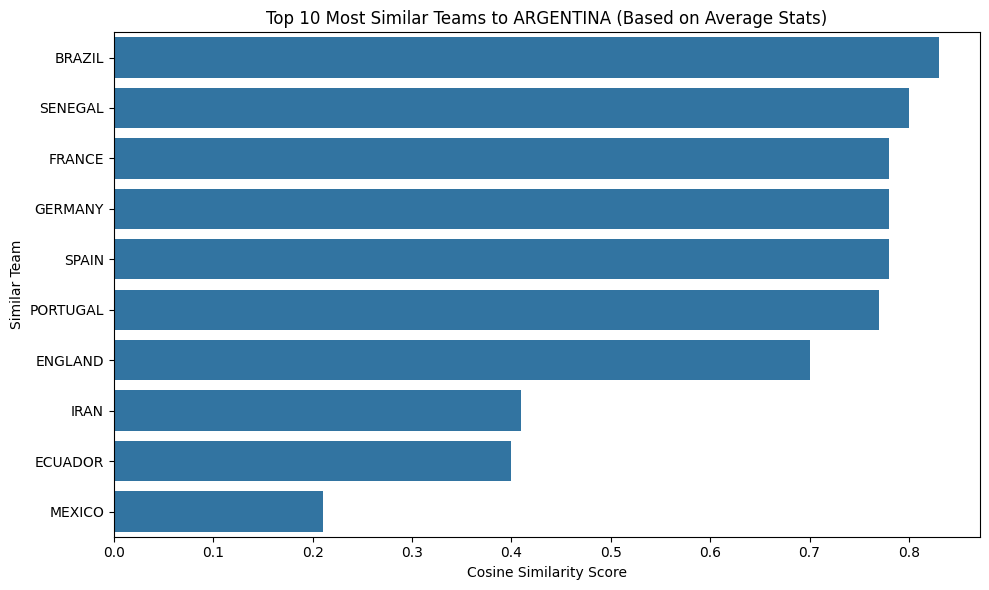

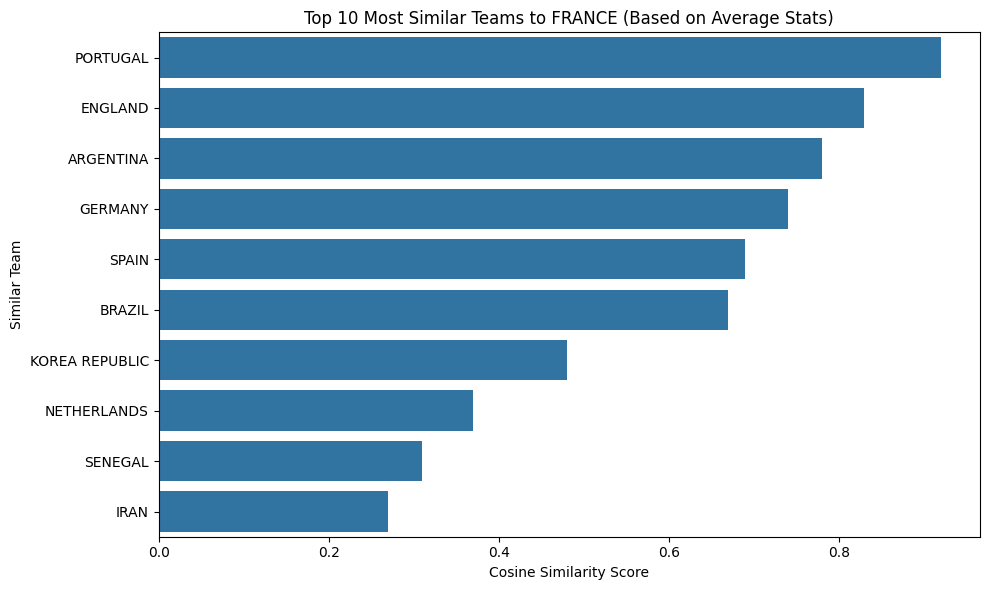

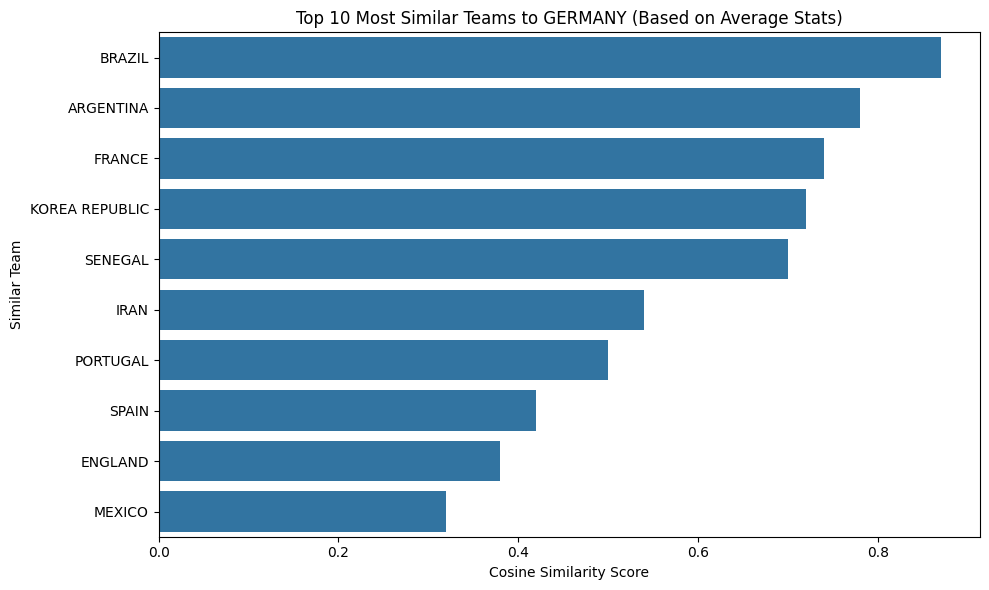

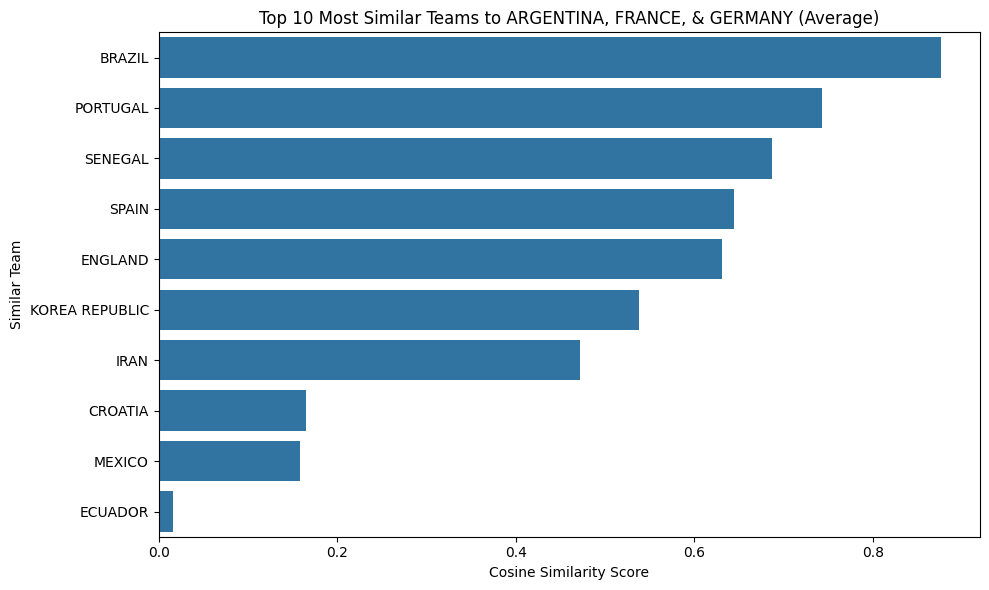

+----------------+--------------+----------+------------------+--------------------+--------------------+
| Team           |   Possession |    Goals |   Total_Attempts |   Goal_Preventions |   Similarity Score |
+================+==============+==========+==================+====================+====================+
| BRAZIL         |      10.8    | 1.6      |          18      |            6.8     |              0.876 |
+----------------+--------------+----------+------------------+--------------------+--------------------+
| PORTUGAL       |      11      | 2.4      |          12.4    |           10.2     |              0.743 |
+----------------+--------------+----------+------------------+--------------------+--------------------+
| SENEGAL        |      12.25   | 1.25     |          12.75   |            9       |              0.687 |
+----------------+--------------+----------+------------------+--------------------+--------------------+
| SPAIN          |       9.5    | 2.25     |  

In [33]:
#Importing the CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fifa_stats.csv")
df.columns = df.columns.str.strip()




# Get similarity data for Argentina
argentina_similarity = get_similar_teams("ARGENTINA", top_n=10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Similar Team', data=argentina_similarity)
plt.title('Top 10 Most Similar Teams to ARGENTINA (Based on Average Stats)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Similar Team')
plt.tight_layout()
plt.show()

# Get similarity data for France
france_similarity = get_similar_teams("FRANCE", top_n=10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Similar Team', data=france_similarity)
plt.title('Top 10 Most Similar Teams to FRANCE (Based on Average Stats)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Similar Team')
plt.tight_layout()
plt.show()

# Get similarity data for Germany
germany_similarity = get_similar_teams("GERMANY", top_n=10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Similar Team', data=germany_similarity)
plt.title('Top 10 Most Similar Teams to GERMANY (Based on Average Stats)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Similar Team')
plt.tight_layout()
plt.show()

def get_similar_to_group(team_list, top_n=10):
    # Check all teams exist
    for team in team_list:
        if team not in scaled_profiles.index:
            raise ValueError(f"{team} not found in scaled_profiles.")

    # Get the average feature vector for the group
    group_vector = scaled_profiles.loc[team_list].mean(axis=0).values.reshape(1, -1)

    # Compute cosine similarity to all teams
    all_teams = scaled_profiles.index
    all_vectors = scaled_profiles.values
    similarities = cosine_similarity(group_vector, all_vectors).flatten()

    # Build DataFrame of results
    results = pd.DataFrame({
        'Team': all_teams,
        'Similarity Score': similarities
    })

    # Exclude original group teams
    results = results[~results['Team'].isin(team_list)]

    # Sort and get top N
    results = results.sort_values(by='Similarity Score', ascending=False).head(top_n).reset_index(drop=True)

    stats = team_profiles.loc[results['Team']].reset_index()
    final_df = stats.copy()

    similarity_scores = results['Similarity Score'].reset_index(drop=True)
    final_df['Similarity Score'] = similarity_scores.round(3)

    return final_df

group_similar = get_similar_to_group(['ARGENTINA', 'FRANCE', 'GERMANY'], top_n=10)

# Create a bar plot for the similar teams to the group
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Team', data=group_similar)
plt.title('Top 10 Most Similar Teams to ARGENTINA, FRANCE, & GERMANY (Average)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Similar Team')
plt.tight_layout()
plt.show()

print(tabulate(group_similar, headers='keys', tablefmt='grid', showindex=False))